In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Student_Marks.csv')
df.head(3)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.shape

(100, 3)

In [5]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [6]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['number_courses'].unique()

array([3, 4, 6, 8, 5, 7], dtype=int64)

In [9]:
#Выясним, есть ли выбросы в данных 
def ejection (col):
    q99 = np.percentile(df[col], 75)
    q01 = np.percentile(df[col], 25)
    iqr = q99 - q01
    ejection_h = q99 + 1.5 * iqr
    ejection_l = q01 - 1.5 * iqr
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    return(ejection_h, ejection_l, ejection_count)

In [10]:
ejection ('time_study')

(12.360374999999998, -4.122624999999999, 0)

In [11]:
ejection ('Marks')

(72.74112499999998, -23.431874999999994, 0)

In [12]:
df_corr = df.corr()
df_corr

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


<Axes: >

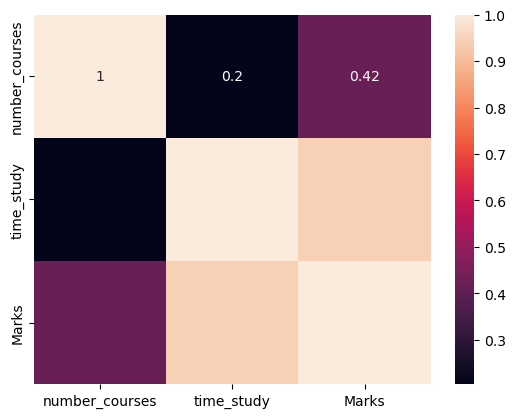

In [13]:
sns.heatmap(df_corr, annot=True)

Как можно заметить по матрице корреляций, наибольшее влияние на зависимую переменную Marks оказывает переменная time_study, затем number_courses. Мультиколлинеарности не обнаружены, поэтому обе переменные, то есть time_study и number_courses можем включать в модель. 

In [14]:
X = df[['time_study', 'number_courses']]
y = df['Marks']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Множественная линейная регрессия

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print('R2 Score на test:', r2_score(y_test, y_pred))

MSE: 12.540851136177057
R2 Score на test: 0.9420722851428084


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\2612082201.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

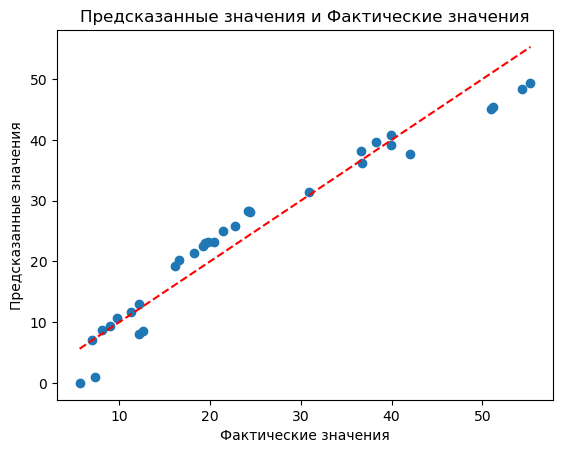

In [17]:
# Предсказанные и фактические значения
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

#### PCA

In [18]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

In [19]:
pca = PCA(n_components=2, whiten=True)

In [20]:
pca = pca.fit(X_train_st)
X_train = pca.transform(X_train_st)
X_test = pca.transform(X_test_st)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print('R2 Score на test:', r2_score(y_test, y_pred))

MSE: 12.780967909561843
R2 Score на test: 0.9409631565972236


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\2612082201.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

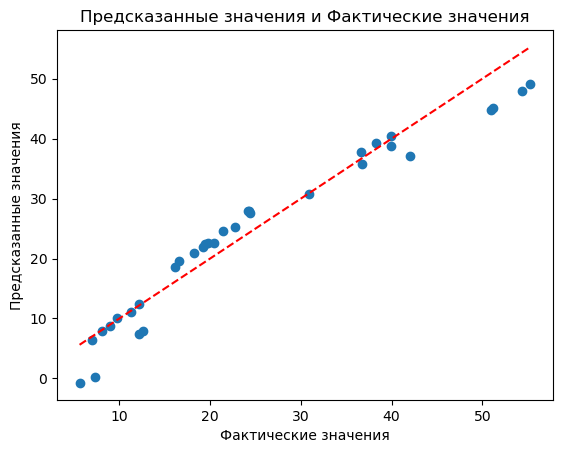

In [22]:
# Предсказанные и фактические значения
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

#### Lasso и Ridge регрессия

In [23]:
# создадим модель Ridge
model = Ridge()
model.fit(X_train_st, y_train)
predictions = model.predict(X_test_st)

In [24]:
print('MSE:', mean_squared_error(y_test, predictions ))
print('R2 Score на test:', r2_score(y_test, predictions))

MSE: 12.934228204036463
R2 Score на test: 0.9402552286790264


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\3067642867.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

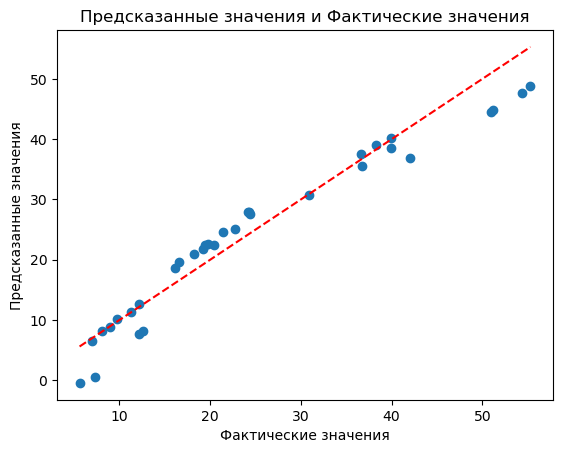

In [25]:
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

In [26]:
# создадим модель Lasso
model = Lasso()
model.fit(X_train_st, y_train)
predictions = model.predict(X_test_st)

In [27]:
print('MSE:', mean_squared_error(y_test, predictions))
print('R2 Score на test:', r2_score(y_test, predictions))

MSE: 15.312377882180387
R2 Score на test: 0.9292702664187027


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\3067642867.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

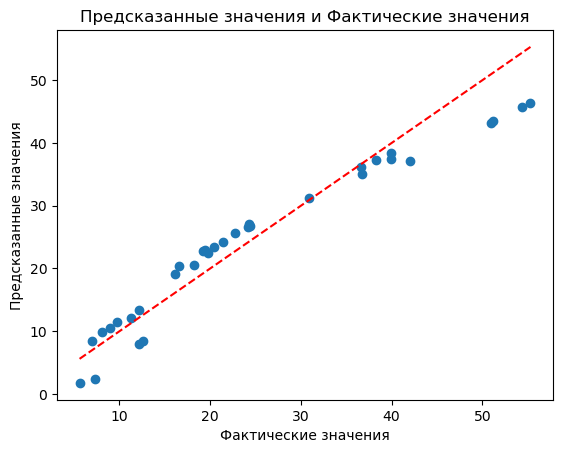

In [28]:
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

#### Модель регрессии с использованием дерева принятия решений 

In [29]:
#создадим модель регрессии с использованием дерева принятия решений
model = DecisionTreeRegressor()
model.fit(X_train_st, y_train)
y_pred = model.predict(X_test_st)

In [30]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score на test:', r2_score(y_test, y_pred))

MSE: 3.7015836363636363
R2 Score на test: 0.9829019355162616


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\1486926002.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

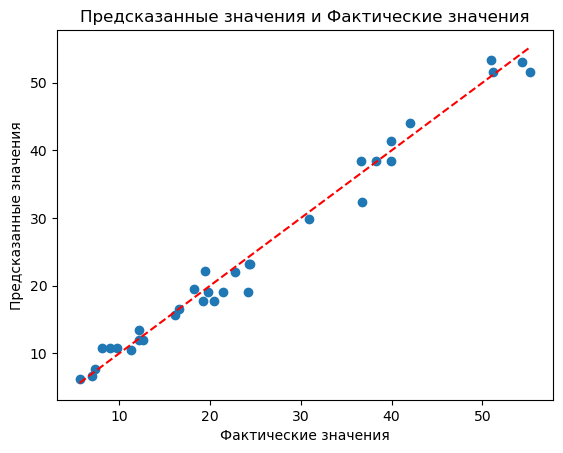

In [31]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

#### Модель случайного леса 

In [32]:
# Создание и обучение модели RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_st, y_train)
y_pred = model.predict(X_test_st)

In [33]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score на test:', r2_score(y_test, y_pred))

MSE: 1.6427507308394296
R2 Score на test: 0.9924119348133401


C:\Users\zelen\AppData\Local\Temp\ipykernel_15024\1486926002.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения и Фактические значения')

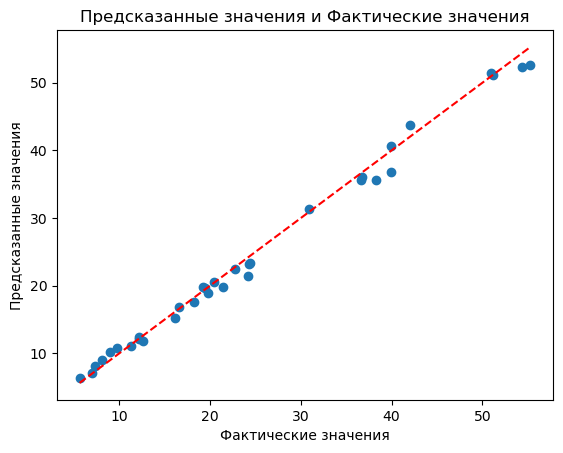

In [34]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения и Фактические значения')

Таким образом, наилучшей моделью для предсказаний значений переменной Marks оказалась модель случайного леса, поскольку R2 для данной модели получился наибольший (0.9924). Также для данной модели значение MSE получилось низким (1.6428). Самой неудачной для предсказаний моделью оказалась модель Lasso, поскольку R2 для данной модели получился наименьший (0.9293). Также значение MSE для данной модели достаточно высоко (15.3124). Однако стоит отметить, что все полученные модели имеют высокую точность предсказаний, поскольку для всех моделей метрика R2 превышает значение 0.9. 